# **遷移式學習** -站在巨人的肩膀上的深度學習

## 1. 人工智慧的問題解決方法: CRISP-DM 框架
<img src="https://www.tribloom.com/wp-content/uploads/2019/08/CRISP-DM_Process_Diagram-768x769.png" height=500>

Follow the CRSIP-DM method
1. Step 1: Import library, import data
2. Step 2: Pre-processing (missing data, categorical type, normalization, format transform)
3. Step 3: Build ML Model
4. Step 4: Evaluate Model
5. Step 5: Deploy (Prediction)

# Step 1: Import library and Loading Data

## Step 1.1 install package 

In [2]:
!pip3 install torch torchvision
!pip3 install gradio
!pip install Pillow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 7.4 MB/s 
     |████████████████████████████████| 54 kB 4.1 MB/s 
     |████████████████████████████████| 84 kB 4.5 MB/s 
     |████████████████████████████████| 212 kB 72.7 MB/s 
     |████████████████████████████████| 84 kB 4.6 MB/s 
     |████████████████████████████████| 112 kB 70.8 MB/s 
     |████████████████████████████████| 270 kB 74.5 MB/s 
     |████████████████████████████████| 2.3 MB 52.9 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 68 kB 7.0 MB/s 
     |████████████████████████████████| 46 kB 4.9 MB/s 
     |██

## Step 1-2: 匯入套件



In [3]:
import gradio as gr
from torchvision import datasets, transforms, models
import torch
import matplotlib.pyplot as plt
import numpy as np

## Step 1-3: 使用GPU on Colab
* device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
* model.to(device)
* inputs = inputs.to(device)
* labels = labels.to(device)



In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Step 1-4 Loading data from github with folders as labels

* ant and bee github <br>
!git clone https://github.com/jaddoescad/ants_and_bees.git

* medical mask github <br>
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git


In [5]:
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590
Receiving objects: 100% (4590/4590), 186.72 MiB | 39.73 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Checking out files: 100% (4155/4155), done.


## Step 1-5 確認目錄
* with_mask 是 Label =0
* without_mask 是 Label=1

In [6]:
!ls ./Face-Mask-Detection/dataset/

with_mask  without_mask


# Step 2: Data Preprocessing


## Step 2-1 資料格式轉換
* 將資料做一些normalization 以增強深度學習模型效能
* 將資料做一些格式轉換以符合深度學習模型的輸入格式 Tensor

In [7]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])


transform = transforms.Compose([transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

training_dataset = datasets.ImageFolder('Face-Mask-Detection/dataset/', transform=transform_train)
validation_dataset = datasets.ImageFolder('Face-Mask-Detection/dataset/', transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=20, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 20, shuffle=False)

In [8]:
validation_dataset = datasets.ImageFolder('Face-Mask-Detection/dataset/', transform=transform)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 20, shuffle=False)

print(len(training_dataset))
print(len(validation_dataset))

4094
4094


## Step 2-2 觀察一下影像資料

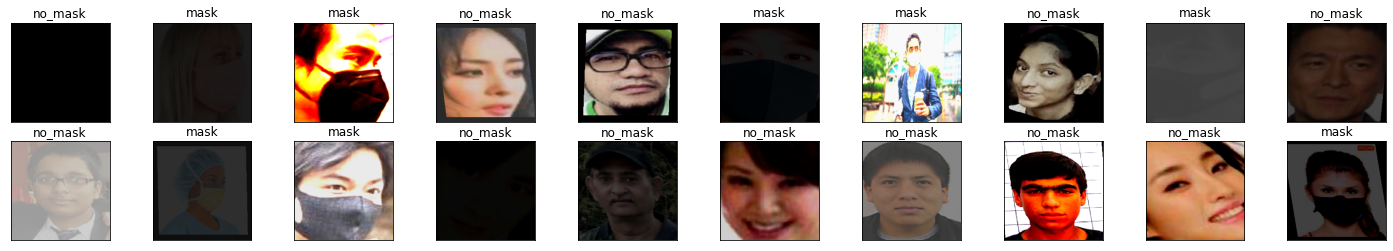

In [9]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

classes=('mask', 'no_mask')

dataiter = iter(training_loader)
images,labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

# Step 3: Build Model
*使用pretraind vgg16模型

## Step 3-1: loading torchvision的 models 預先triain好的模型
* 所有pre-trained models in torchvision

https://pytorch.org/vision/0.8/models.html

* AlexNet
* VGG
* ResNet
* SqueezeNet
* DenseNet
* Inception v3
* GoogLeNet
* ShuffleNet v2
* MobileNet v2
* ResNeXt
* Wide ResNet
* MNASNet

## Step 3-2 各經典模型summary <br>
https://ithelp.ithome.com.tw/articles/10192162

<img src="https://ithelp.ithome.com.tw/upload/images/20171206/200019764r3qCPSJxX.png" height=800, width=300>Vgg16</img>

圖. VGG16 結構圖，圖片來源：Building powerful image classification models using very little data



## Step 3-3  使用vgg16 pretrain 模型

In [10]:
model = models.vgg16(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

## Step 3-4 把梯度更新全部關閉, 只留後面三級分類層 (vgg16/vgg19示意圖)
 
<img src="https://ithelp.ithome.com.tw/upload/images/20171206/20001976yeCo1PvEOs.jpg" width=500 />

In [11]:

for param in model.features.parameters():
  param.requires_grad = False

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Step 3-5 修改模型讓最後輸出兩類

In [12]:
import torch.nn as nn
n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes)) # 2 classes 最後一級
model.classifier[6] = last_layer
model.to(device)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

epochs = 3
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs,labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch : 1
training loss: 0.0117, acc 0.8791 
validation loss: 0.0013, validation acc 0.9924 


In [ ]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [ ]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [ ]:
# !pip3 install pillow==4.0.0
import PIL.ImageOps

In [ ]:


import requests
from PIL import Image

url = 'http://media.rojaklah.com/wp-content/uploads/2017/09/19150232/1909bigstar1.jpg'

response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)


In [ ]:

img = transform(img) 
plt.imshow(im_convert(img))

In [ ]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

In [ ]:
import requests
from PIL import Image


url2='http://i1.kknews.cc/L4QL2XatiKQt9Z6yC-ttG4KM-Gk48BY/0.jpg'
response = requests.get(url2, stream = True)
img = Image.open(response.raw)
plt.imshow(img)
img = transform(img) 
plt.imshow(im_convert(img))
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

In [ ]:
print(classes[pred.item()])


## 特別介紹 gradio :https://www.gradio.app/ <br>
Gradio is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!

In [ ]:
def predict(img):
    labels = ['mask', 'no_mask']
    image = transforms.ToTensor()(img).unsqueeze(0)
    prediction = torch.nn.functional.softmax(model(image)[0], dim=0)
    confidences = {labels[i]: float(prediction[i]) for i in range(2)}
    return confidences

gr.Interface(fn=predict, 
             inputs=gr.Image(type="pil"),
             outputs=gr.Label(num_top_classes=3)).launch(share='True')